In [108]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline
np.set_printoptions(suppress=True)

## Histogram Equalization

This function receives an image, converts it to grayscale and then it equalizes the histogram to convert into a normal distribution.

In [130]:
def hist_eq(image):
    im = cv2.imread(image)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    #original gray scale histogram
    plt.hist(im_gray.flatten(), bins = 256, color = 'gray')
    plt.axvline(im_gray.mean(), color='k', linestyle='dashed', linewidth=2)
    plt.title('Original Histogram')
    plt.show()
    
    pixels = im_gray.flatten()
    count, bins = np.histogram(pixels, bins = 256)
    
    #cdf
    cdf = pd.DataFrame(np.cumsum(count/sum(count))).reset_index(col_level=0)
    cdf.columns = ['pixels', 'cdf']

    #original gray scale pixels
    pixels = pd.DataFrame(pixels)
    pixels.columns = ['pixels']
    
    #transformation
    out = pd.merge(pixels, cdf, on = 'pixels', how='left')
    out['out'] = 255*out['cdf']
    
    #out
    out = np.array(out['out']).reshape(im_gray.shape[0], im_gray.shape[1], 1)

    count, bins = np.histogram(out, bins = 256)
    
    #result histogram
    plt.hist(out.flatten(), bins = 256, color = 'gray')
    plt.axvline(out.mean(), color='k', linestyle='dashed', linewidth=2)
    plt.title('Result Histogram')
    plt.show()
    
    #original image
    cv2.imwrite("original_gray.jpg", im_gray)
    original_gray_image = cv2.imread("original_gray.jpg")
    cv2.imshow("Original Gray Image", original_gray_image)
    
    #result image
    cv2.imwrite("gray.jpg", out)
    gray_image = cv2.imread("gray.jpg")
    cv2.imshow("Result Gray Image", gray_image)
    
    #parameters
    cv2.waitKey(16000)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    sys.exit()

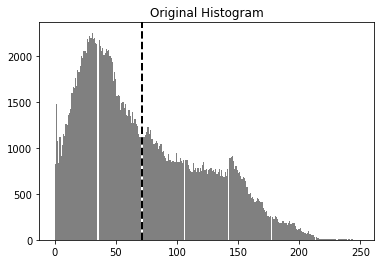

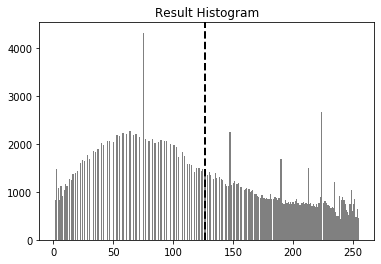

SystemExit: 

In [131]:
hist_eq('nature.jpg')

### Original Grayscale Image

<img src="original_gray.jpg"/>

### Result Grayscale Image

<img src="gray.jpg"/>

As you can see we have a more clear image with the same content.